Dieser Programmteil soll für die Zuordnung vom Raum (S115) zu Koordinaten sorgen (x,y)

In [ ]:
roomplan = {}
mystring = "S103"
roomplan[mystring] = [5, 6]
print(roomplan)
# print(type(roomplan.get(mystring)[0]))

matrix2= [['S100', '0', '0'], ['S101', '0', '0'], ['S102', '400', '150'], ['S103', '650', '150'], ['S104', '900', '150'], ['S105', '1090', '150'], ['S106', '1260', '150'], ['S107', '1560', '150'], ['S108', '1750', '150'], ['S109', '1670', '400'], ['S110', '1500', '380'], ['S111', '0', '0'], ['S112', '0', '0'], ['S113', '0', '0'], ['S114', '0', '0'], ['S115', '980', '400'], ['S116', '670', '400'], ['S117', '370', '400']]
dict= {'S100': ('0', '0'), 'S101': ('0', '0'), 'S102': ('400', '150'), 'S103': ('650', '150'), 'S104': ('900', '150'), 'S105': ('1090', '150'), 'S106': ('1260', '150'), 'S107': ('1560', '150'), 'S108': ('1750', '150'), 'S109': ('1670', '400'), 'S110': ('1500', '380'), 'S111': ('0', '0'), 'S112': ('0', '0'), 'S113': ('0', '0'), 'S114': ('0', '0'), 'S115': ('980', '400'), 'S116': ('670', '400'), 'S117': ('370', '400')}
<class 'dict_items'>
dict_values([('0', '0'), ('0', '0'), ('400', '150'), ('650', '150'), ('900', '150'), ('1090', '150'), ('1260', '150'), ('1560', '150')

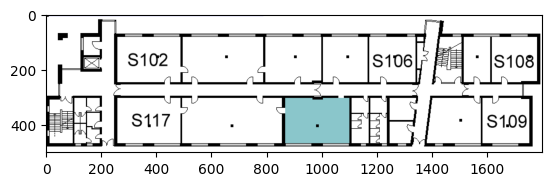

In [77]:
import re
import matplotlib.pyplot as plt
from skimage import io

img_S100 = io.imread("raumplan.png")
img_S100 = img_S100[620:1120, :, :]
room_coordinates = "0,0;0,0;400,150;650,150;900,150;1090,150;1260,150;1560,150;1750,150;1670,400;1500,380;0,0;0,0;0,0;0,0;980,400;670,400;370,400"
words = room_coordinates.split(sep=";")
i = 0

array3D = []
roomplan = {}
s = "S102"
append = ""
for word in words:
    x, y = word.split(sep=",")
    # because the image was cropped, the original x- (and y-) values have to be corrected accordingly 
    #y=int(x)
    #y-=int(620)
    append = str(i)
    # if i is less than 10, add a 0 so that all strings have length 2
    if (len(append) == 1):
        append = "0"+append
    if (len(append) != 2):
        raise NotImplementedError("add support for more than 99 rooms")
    array3D.append(["S1"+append, x, y])
    roomplan["S1"+append] = x, y
    i += 1
print("matrix2=", array3D)
print("dict=", roomplan)
# search for string in list. Maps are probably a lot better for this
for item in array3D:
    if isinstance(item, str) and re.search(s, item):
        print(f'{s} is present in the list')
        break

plt.imshow(img_S100)
print(type(roomplan.items()))
print(roomplan.values())
print(type(roomplan.values()))
print(roomplan.values())
roomplan_list=list(roomplan.values())
print(roomplan_list[0])
print(img_S100.shape)
offset=20
for room in roomplan_list:
    x,y=list(room)
    x,y=int(x),int(y)
    print(x,y)
    img_S100[y:y+offset,x:x+offset,0]=0
    img_S100[y:y+offset,x:x+offset,1]=0
    img_S100[y:y+offset,x:x+offset,2]=0
#plt.scatter(roomplan.items)
plt.imshow(img_S100)
plt.show()      

